In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compress_image(image_adress, K):

    image = plt.imread(image_adress)
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]

    r_u,r_s,r_v = np.linalg.svd(r)
    g_u,g_s,g_v = np.linalg.svd(g)
    b_u,b_s,b_v = np.linalg.svd(b)

    r_decomposed = np.matmul(np.matmul(r_u[:,0:K] , np.diag(r_s)[0:K,0:K]) , r_v[0:K,:])
    g_decomposed = np.matmul(np.matmul(g_u[:,0:K] , np.diag(g_s)[0:K,0:K]) , g_v[0:K,:])
    b_decomposed = np.matmul(np.matmul(b_u[:,0:K] , np.diag(b_s)[0:K,0:K]) , b_v[0:K,:])

    r_decomposed = r_decomposed.astype('uint8')
    g_decomposed = g_decomposed.astype('uint8')
    b_decomposed = b_decomposed.astype('uint8')

    img_decomposed = np.stack([r_decomposed,g_decomposed,b_decomposed],axis=2)
    return(img_decomposed)

In [3]:
image_adresses = ['1.bmp','2.bmp','3.bmp']
K_list = [50, 100, 150, 250, 400,800]

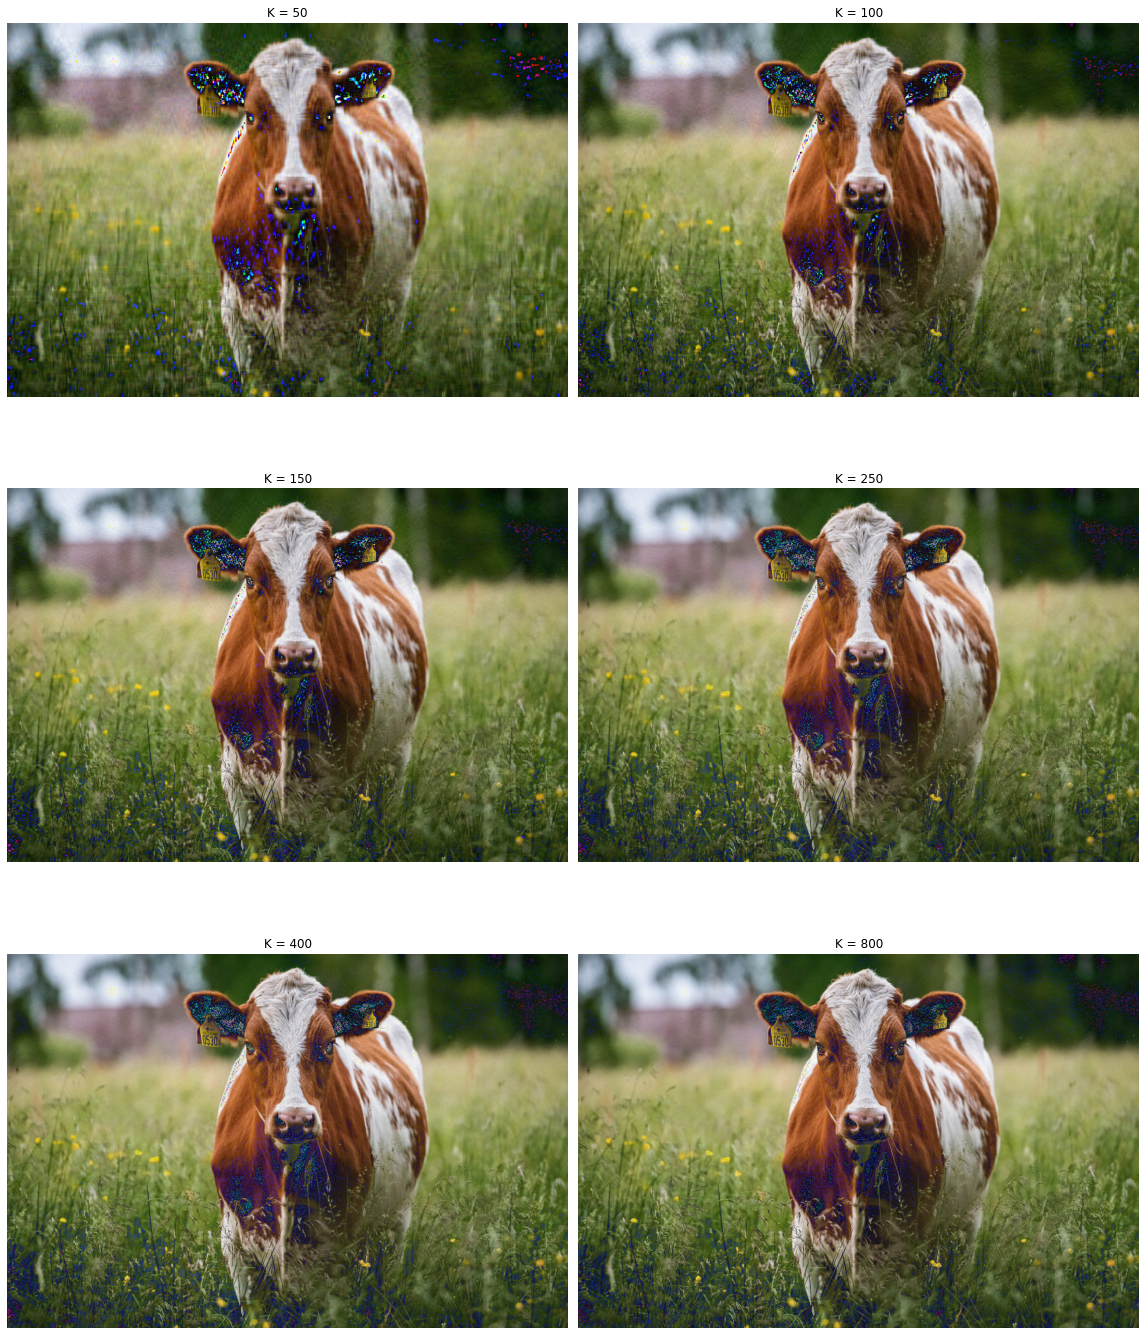

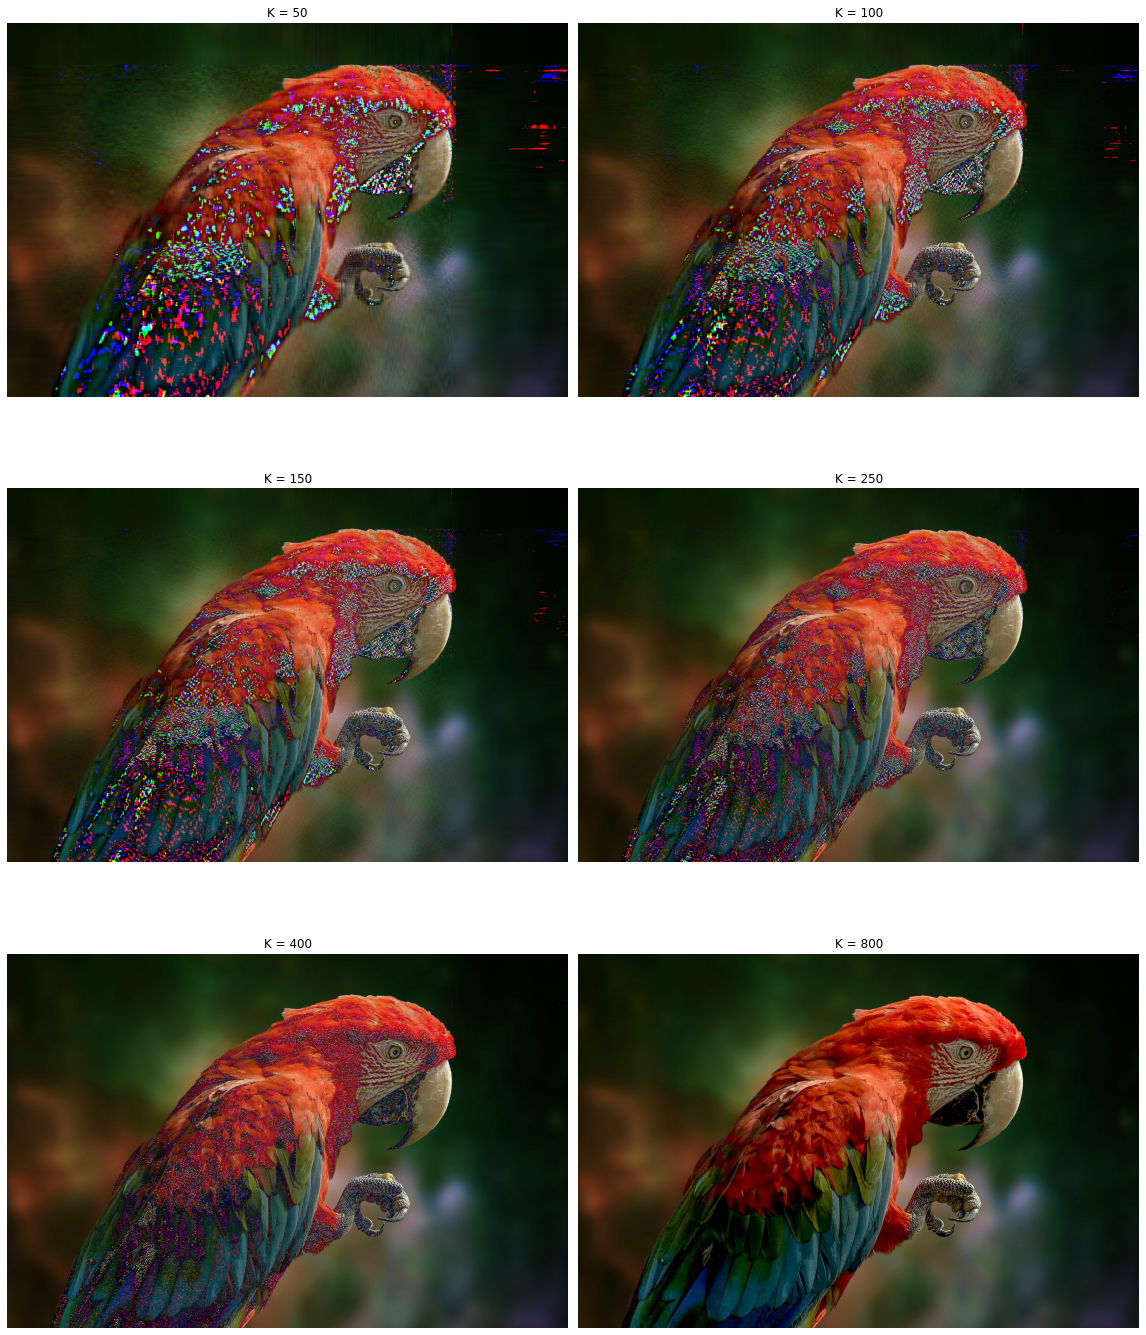

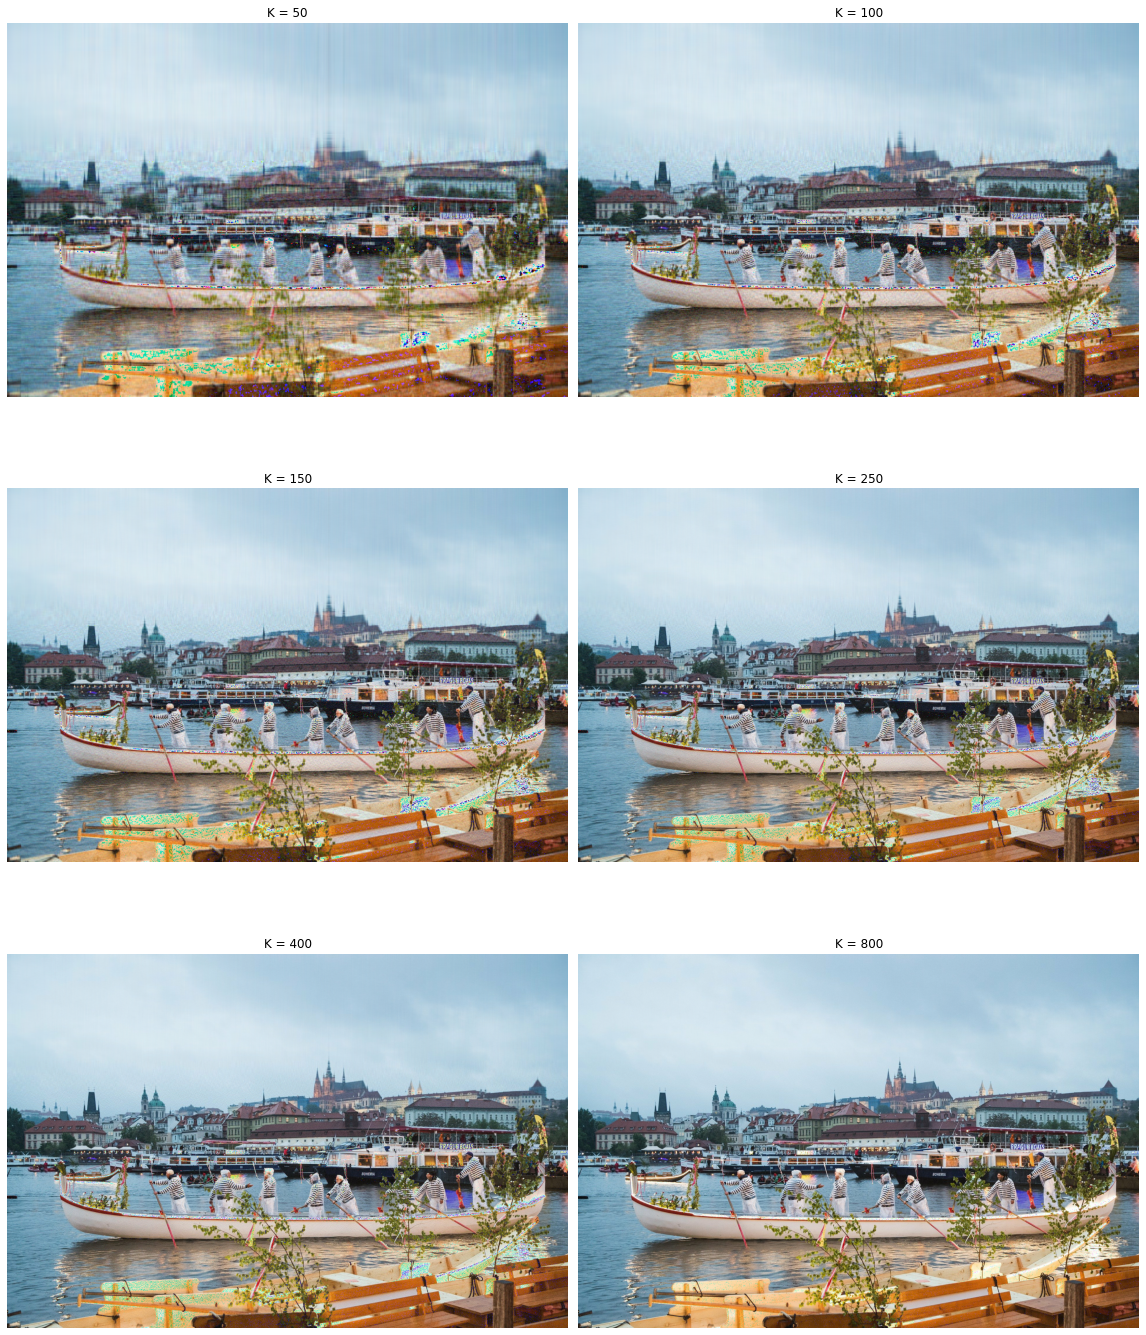

In [7]:
for image_add in image_adresses:
    plt.figure(figsize=(16,20))
    for index ,K in enumerate(K_list):
        compressed_image = compress_image(image_add, K)
        plt.subplot(3,2,index+1)
        plt.imshow(compressed_image)
        plt.title(f'K = {K}')
        plt.axis("off")
    plt.tight_layout(pad=1)
    plt.savefig('decomposed'+image_add[0])
    plt.show()